Mounted at /content/drive
First 5 rows of dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



Dataset Shape: (4521, 17)

Column Names:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Target variable (y) distribution:
y
no     4000
yes     521
Name: count, dtype: int64

Training Data Shape: (3616, 16)
Testing Data Shape: (905, 16)

Model Accuracy: 0.8983425414364641

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.55      0.33      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



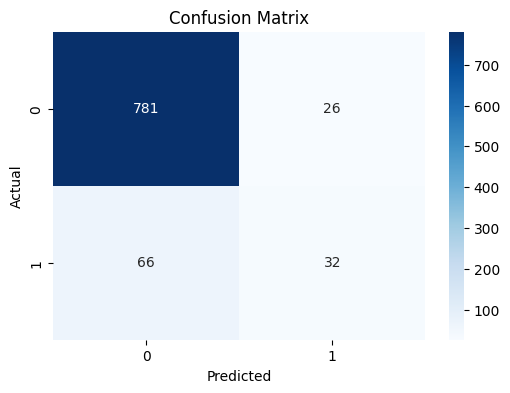

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/MyDrive/Data_Science_T3/bank.csv"

df = pd.read_csv(data_path, sep=';')

print("First 5 rows of dataset:")
display(df.head())

print("\nDataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns)

print("\nTarget variable (y) distribution:")
print(df['y'].value_counts())

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


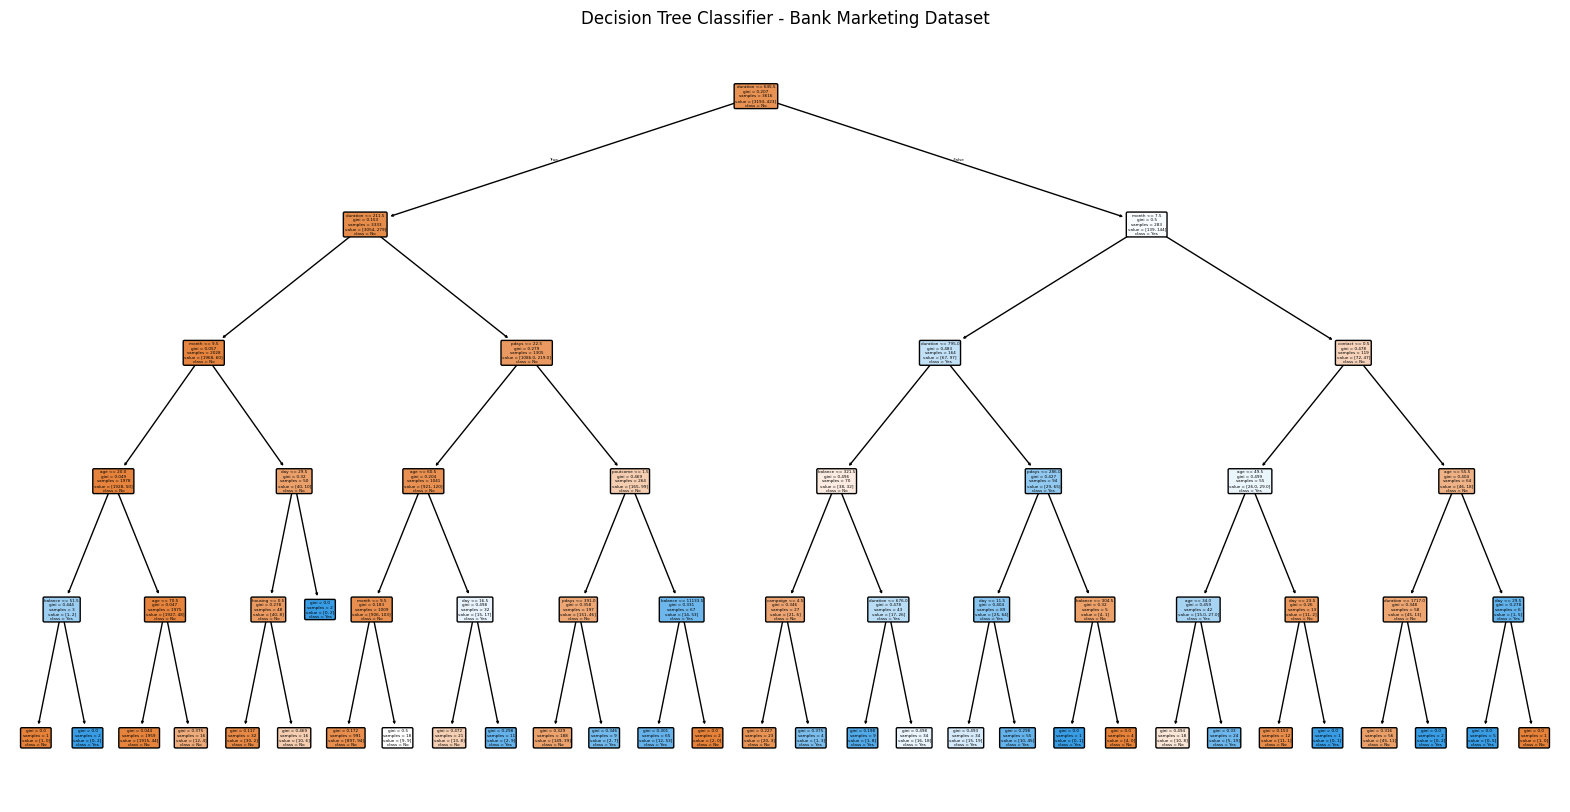

In [2]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Classifier - Bank Marketing Dataset")
plt.show()


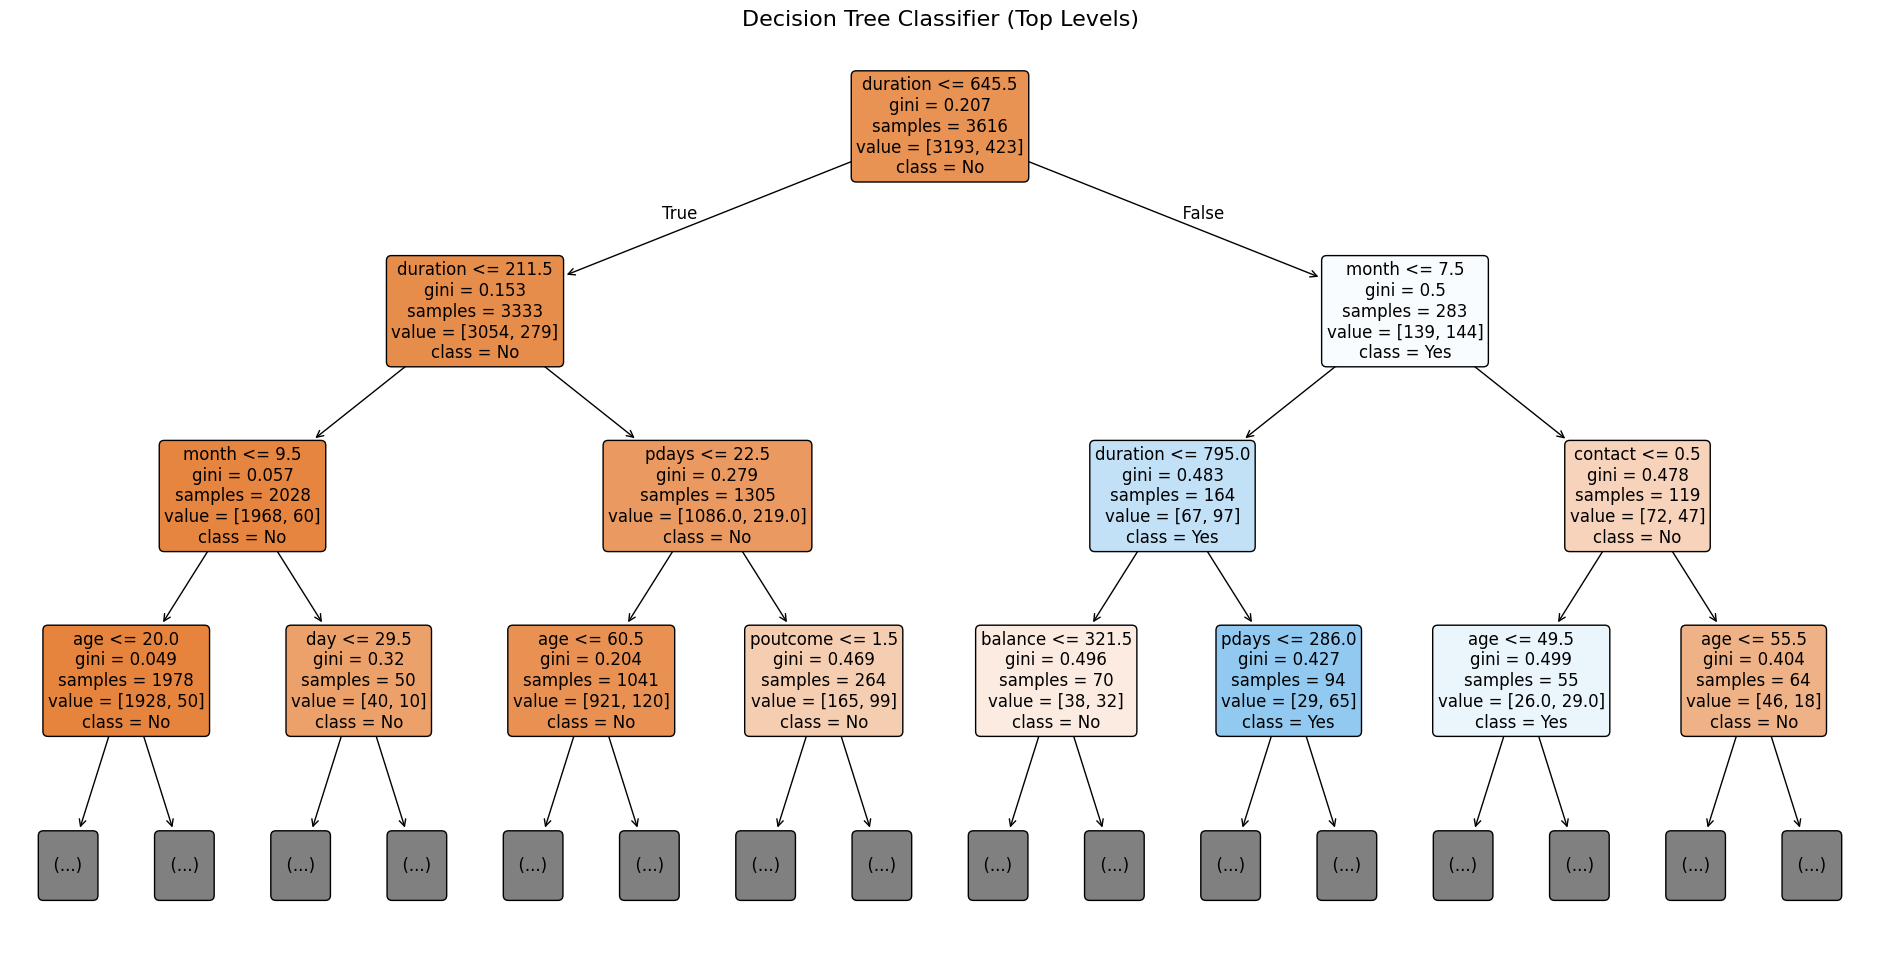

In [4]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24,12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=12
)
plt.title("Decision Tree Classifier (Top Levels)", fontsize=16)
plt.show()
